In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd 'drive/My Drive/College/Fall 2022/ML 4641'
%cd 'drive/My Drive/College/Fall 2022/ML 4641'
# %ls

[Errno 2] No such file or directory: 'drive/My Drive/College/Fall 2022/ML 4641'
/content/drive/My Drive/College/Fall 2022/ML 4641


In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from CreditCardData import CreditCardData
from sklearn import mixture
from sklearn.metrics import recall_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
ccd = CreditCardData(split=True)

smote = SMOTE(random_state=42) # desired ratio minority/majority = 0.1
X_smote, y_smote = smote.fit_resample(ccd.data_train, ccd.labels_train)
# s = X_smote.shape[0]
# s = int(s/3)
# X_smote, y_smote = X_smote[:s], y_smote[:s]



sc=StandardScaler()
scaler = sc.fit(X_smote)
trainX_scaled = scaler.transform(X_smote)
testX_scaled = scaler.transform(ccd.data_test)

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(50, 200, 200, 50), learning_rate='adaptive', max_iter=50, verbose=True, tol=.0001)

param_grid = {
    'hidden_layer_sizes':  [(50,200,50), (50, 200, 200, 50)],
}

In [ ]:
# grid = GridSearchCV(MLPC, param_grid, n_jobs=1, cv=3, verbose=3)
# grid.fit(trainX_scaled, y_smote)
# print(grid.best_params_) 

# y_pred = grid.predict(testX_scaled) 

In [ ]:
# fit model
MLPC.fit(trainX_scaled, y_smote)
y_pred = MLPC.predict(testX_scaled)
print(y_pred)

# assess model
score = MLPC.score(testX_scaled, ccd.labels_test)
print("Accuracy:", score)

Iteration 1, loss = 0.02031467
Iteration 2, loss = 0.00468800
Iteration 3, loss = 0.00339706
Iteration 4, loss = 0.00270996
Iteration 5, loss = 0.00216764
Iteration 6, loss = 0.00196679
Iteration 7, loss = 0.00184150
Iteration 8, loss = 0.00152645
Iteration 9, loss = 0.00154388
Iteration 10, loss = 0.00144088
Iteration 11, loss = 0.00156322
Iteration 12, loss = 0.00129383
Iteration 13, loss = 0.00116433
Iteration 14, loss = 0.00125687
Iteration 15, loss = 0.00112630
Iteration 16, loss = 0.00103857
Iteration 17, loss = 0.00105385
Iteration 18, loss = 0.00134036
Iteration 19, loss = 0.00091409
Iteration 20, loss = 0.00109447
Iteration 21, loss = 0.00113483
Iteration 22, loss = 0.00093220
Iteration 23, loss = 0.00102752
Iteration 24, loss = 0.00096214
Iteration 25, loss = 0.00083949
Iteration 26, loss = 0.00091521
Iteration 27, loss = 0.00080588
Iteration 28, loss = 0.00098239
Iteration 29, loss = 0.00089785
Iteration 30, loss = 0.00091357
Iteration 31, loss = 0.00074649
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[0 0 0 ... 0 0 0]
Accuracy: 0.9994908886626171


Accuracy: 0.99949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.87      0.83      0.85       100

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

PRECIDIONS 0.8736842105263158
AUCROC 0.914894481375963
Confusion Matrix
 [[56850    12]
 [   17    83]]


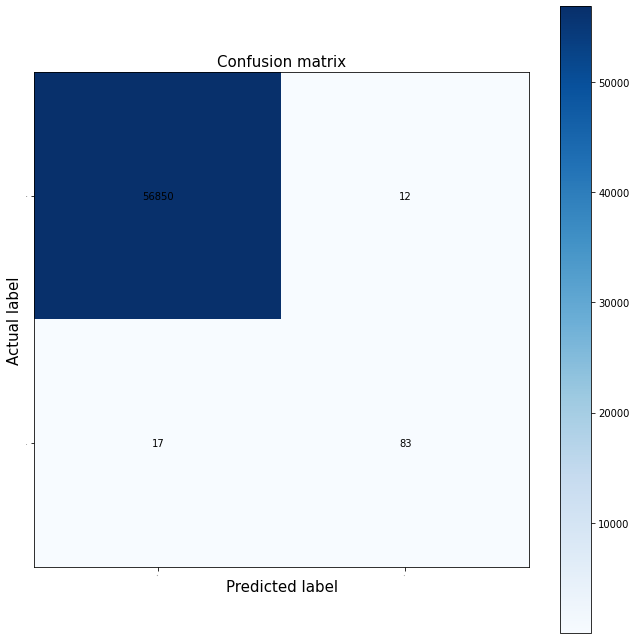

In [ ]:
print('Accuracy: {:.5f}'.format(metrics.accuracy_score(ccd.labels_test, y_pred)))

report = metrics.classification_report(ccd.labels_test, y_pred)
print(report)

precision = metrics.precision_score(ccd.labels_test, y_pred)
print("PRECIDIONS", precision)

aucroc = metrics.roc_auc_score(ccd.labels_test, y_pred)
print("AUCROC", aucroc)


# Obtenemos valores de recall
recall_acc = recall_score(ccd.labels_test,y_pred)


# calc confusion matix
cm = metrics.confusion_matrix(ccd.labels_test, y_pred)
print("Confusion Matrix\n", cm)

# show confusion matrix
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix', size=15)
plt.colorbar()

plt.xticks([0, 1], ["0", "1"], rotation=45, size=2)
plt.yticks([0, 1], ["0", "1"], size = 2)
plt.tight_layout()
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')

plt.savefig("nn.png")
plt.show()